<a href="https://colab.research.google.com/github/Gabrielasumera/fuzzy-logic-projects/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem - Intensywność podlewania

W zależności od wskazań czujnika temperatury [Input 1] i wilgotności powietrza [Input 2] sterownik wysyła sygnał wyjściowy, który reguluje zawór wodny ustalając intensywność podlewania [Output 1], zgodnie z opracowanymi przez eksperta regułami rozmytymi [Rules]. Uwzględniając zadane poniżej wartości wejść oraz konkluzji opracuj system wnioskowania T-S oraz oblicz dla każdego scenariusza wynik wnioskowania.

**Input 1:**\
Name='Temp'\
Range=[0 35]\
T1='Zimno':'trapmf',[0 0 5 15]\
T2='Cieplo':'trimf',[15 25 35]\
T3='Letnio':'trimf',[5 15 25]\
T4='Goraco':'trimf',[25 35 35]\

**Input 2:**\
Name='Wilg'
Range=[0 100]\
NumMFs=3\
W1='Mala':'trapmf',[-2 0 25 50]\
W2='Srednia':'trimf',[25 50 100]\
W3='Duza':'trimf',[50 100 120]\

**Output 1**\
Name='Podlej'\
Range=[0 100]\
OUT1='Zero':'constant',[0]\
OUT2='Mala':'constant',[25]\
OUT3='Srednia':'constant',[50]\
OUT4='Duza':'constant',[75]\
OUT5='MaX':'constant',[100]\

**Reguły:**
1. JEŻELI Temp=Zimno & Wilg=Mala TO Podlej=Srednia
2. JEŻELI Temp=Zimno & Wilg=Srednia TO Podlej=Mala
3. JEŻELI Temp=Zimno & Wilg=Duza TO Podlej=Zero

**Scenariusz 1:**
[Input 1] = 10; [Input 2]=40

**Scenariusz 2:**
[Input 1] = 11; [Input 2]=70



# Biblioteki

In [ ]:
!pip install simpful

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import simpful as sf

# System - ostre(stałe) wyjście T-S 0 stopień

In [ ]:
from simpful import *

In [ ]:

# Tworzenie obiektu systemu rozmytego
FS = FuzzySystem()

In [ ]:

# Definiowanie zmiennej lingwistycznej tempearatura
T1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=5, d=15), term="zimno")
T2 = FuzzySet(function=Triangular_MF(a=15, b=25, c=35), term="cieplo")
T3 = FuzzySet(function=Triangular_MF(a=5, b=15, c=25), term="letnio")
T4 = FuzzySet(function=Triangular_MF(a=25, b=35, c=35), term="goraco")

LV1 = LinguisticVariable([T1,T2,T3,T4], universe_of_discourse=[0,35])

FS.add_linguistic_variable("Temp", LV1)



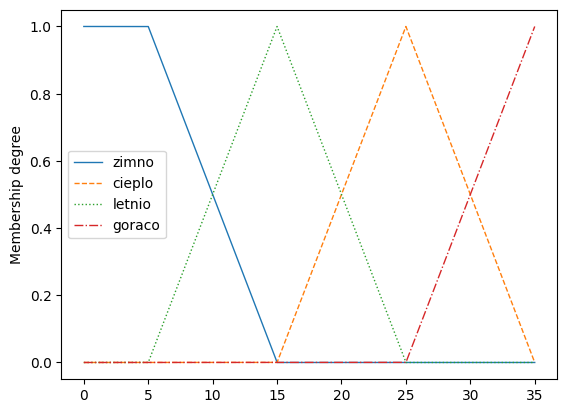

In [ ]:
LV1.plot()

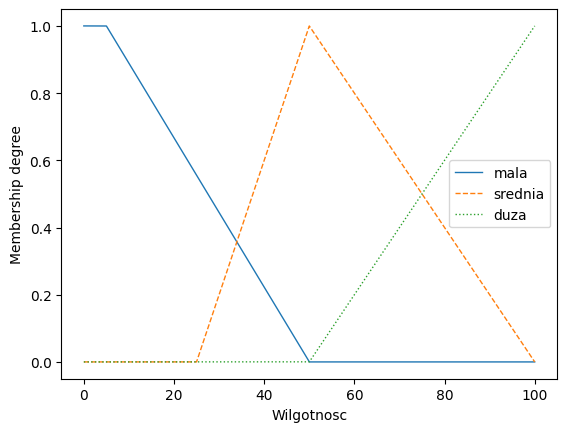

In [ ]:
# Definiowanie zmiennej lingwistycznej wilgotnosc
W1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=5, d=50), term="mala")
W2 = FuzzySet(function=Triangular_MF(a=25, b=50, c=100), term="srednia")
W3 = FuzzySet(function=Triangular_MF(a=50, b=100, c=100), term="duza")
LV2 = LinguisticVariable([W1, W2, W3], concept="Wilgotnosc", universe_of_discourse=[0, 100])
FS.add_linguistic_variable("Wilg", LV2)
LV2.plot()

In [ ]:
# Definiowanie konkluzji - stałe wartości
FS.set_crisp_output_value("zero", 0)
FS.set_crisp_output_value("small", 25)
FS.set_crisp_output_value("medium", 50)
FS.set_crisp_output_value("big", 75)
FS.set_crisp_output_value("vbig", 100)


 * Detected Sugeno model type


In [ ]:
# Definiowanie reguł
RULE1 = "IF (Temp IS zimno) AND (Wilg IS mala) THEN (Podlej IS medium)"
RULE2 = "IF (Temp IS zimno) AND (Wilg IS srednia) THEN (Podlej IS small)"
RULE3 = "IF (Temp IS zimno) AND (Wilg IS duza) THEN (Podlej IS zero)"

# Add fuzzy rules to the fuzzy reasoner object
FS.add_rules([RULE1, RULE2, RULE3])



In [ ]:
FS.produce_figure(outputfile='lvs.pdf')

In [ ]:
# Przypisanie wartosci wejsciowych
FS.set_variable("Temp", 10)
FS.set_variable("Wilg", 40)


FS.Sugeno_inference(["Podlej"])





{'Podlej': 32.69230769230769}

In [ ]:
FS.inference(["Podlej"])

{'Podlej': 32.69230769230769}

# System - funkcje na wyjściu T-S I stopnia

In [ ]:

from simpful import *

# Tworzenie obiektu systemu rozmytego
FS_fun = FuzzySystem()

# Definiowanie zmiennej lingwistycznej tempearatura
T1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=5, d=15), term="zimno")
T2 = FuzzySet(function=Triangular_MF(a=15, b=25, c=35), term="cieplo")
T3 = FuzzySet(function=Triangular_MF(a=5, b=15, c=25), term="letnio")
T4 = FuzzySet(function=Triangular_MF(a=25, b=35, c=35), term="goraco")
LV1 = LinguisticVariable([T1,T2,T3,T4], concept="Tempeartura", universe_of_discourse=[0,35])
FS_fun.add_linguistic_variable("Temp", LV1)


# Definiowanie zmiennej lingwistycznej wilgotnosc
W1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=5, d=50), term="mala")
W2 = FuzzySet(function=Triangular_MF(a=25, b=50, c=100), term="srednia")
W3 = FuzzySet(function=Triangular_MF(a=50, b=100, c=100), term="duza")
LV2 = LinguisticVariable([W1, W2, W3], concept="Wilgotnosc", universe_of_discourse=[0, 100])
FS_fun.add_linguistic_variable("Wilg", LV2)

# Definiowanie konkluzji - funkcje
FS_fun.set_output_function("zero", "Wilg*0")
FS_fun.set_output_function("small", "Wilg*0.5")
FS_fun.set_output_function("medium", "Wilg*1")
FS_fun.set_output_function("big", "Wilg*2")
FS_fun.set_output_function("vbig", "Wilg*3")

# Definiowanie reguł
RULE1 = "IF (Temp IS zimno) AND (Wilg IS mala) THEN (Podlej IS medium)"
RULE2 = "IF (Temp IS zimno) AND (Wilg IS srednia) THEN (Podlej IS small)"
RULE3 = "IF (Temp IS zimno) AND (Wilg IS duza) THEN (Podlej IS zero)"

# Add fuzzy rules to the fuzzy reasoner object
FS_fun.add_rules([RULE1, RULE2, RULE3])

# Przypisanie wartosci wejsciowych
FS_fun.set_variable("Temp", 10)
FS_fun.set_variable("Wilg", 40)




# Przeprowadź wnioskowanie Sugeno i wydrukuj wynik
sugeno_result = FS_fun.Sugeno_inference(["Podlej"])
print(FS_fun.Sugeno_inference(["Podlej"]))


# # Dobierz i przeprowadz wnioskowanie oraz wydrukuj wynik
# print(f'Inference: {FS.inference()}')

#FS_fun.produce_figure(outputfile='lvs.pdf')



  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
{'Podlej': 26.153846153846153}


# Wykresy powierzchniowe

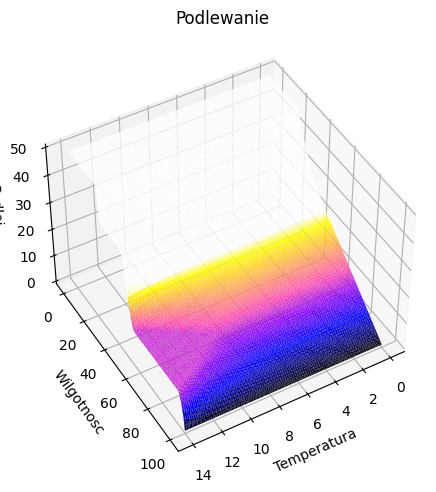

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace, array

# Plotting surface
t = []
w = []
p = []
DIVs = 100
for x in linspace(0,14,DIVs):
    for y in linspace(0,100,DIVs):
        FS.set_variable("Temp", x)
        FS.set_variable("Wilg", y)
        pod = FS.inference()['Podlej']
        t.append(x)
        w.append(y)
        p.append(pod)
t = array(t)
w = array(w)
p = array(p)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = plt.meshgrid(t,w)

ax.plot_trisurf(t,w,p, vmin=0, vmax=25, cmap='gnuplot2')
ax.set_xlabel("Temperatura")
ax.set_ylabel("Wilgotnosc")
ax.set_zlabel("Podlej")
ax.set_title("Podlewanie", pad=20)
ax.set_zlim(0, 50)
#ax.view_init(45, 45)
ax.view_init(45, 60)
plt.tight_layout()
plt.show()

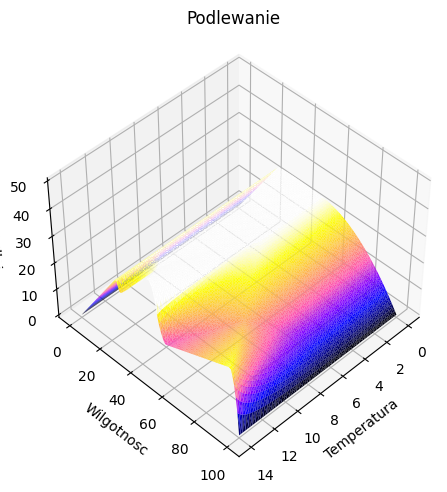

In [ ]:
import matplotlib.pylab as plt
from numpy import linspace, array

# Plotting surface
t = []
w = []
p = []
DIVs = 100
for x in linspace(0,14,DIVs):
    for y in linspace(0,100,DIVs):
        FS_fun.set_variable("Temp", x)
        FS_fun.set_variable("Wilg", y)
        pod = FS_fun.inference()['Podlej']
        t.append(x)
        w.append(y)
        p.append(pod)
t = array(t)
w = array(w)
p = array(p)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = plt.meshgrid(t,w)

ax.plot_trisurf(t,w,p, vmin=0, vmax=25, cmap='gnuplot2')
ax.set_xlabel("Temperatura")
ax.set_ylabel("Wilgotnosc")
ax.set_zlabel("Podlej")
ax.set_title("Podlewanie", pad=20)
ax.set_zlim(0, 50)
ax.view_init(45, 45)
#ax.view_init(10, 0)
plt.tight_layout()
plt.show()

# Wybrane zbiory rozmyte

## Crisp

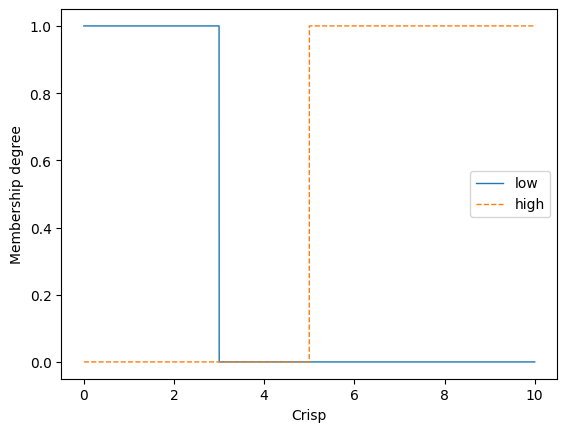

In [ ]:
import simpful as sf

# Dostępne zbiory rozmyte

# Crisp
C1 = FuzzySet(function=Crisp_MF(a=0, b=3), term="low")
C2 = FuzzySet(function=Crisp_MF(a=5, b=10), term="high")
sf.LinguisticVariable([C1,C2], concept="Crisp", universe_of_discourse=[0,10]).plot()

## Point-based polygon

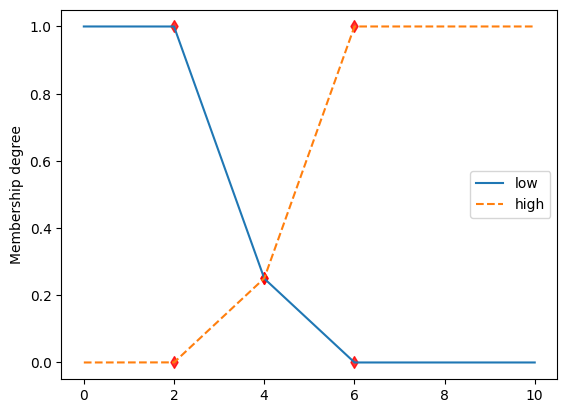

In [ ]:
# Point-based polygon
P1 = FuzzySet(points=[[2.0, 1.0], [4.0, 0.25], [6.0, 0.0]], term="low")
P2 = FuzzySet(points=[[2.0, 0.0], [4.0, 0.25], [6.0, 1.0]], term="high")
sf.LinguisticVariable([P1, P2], universe_of_discourse=[0, 10]).plot()

## Triangle

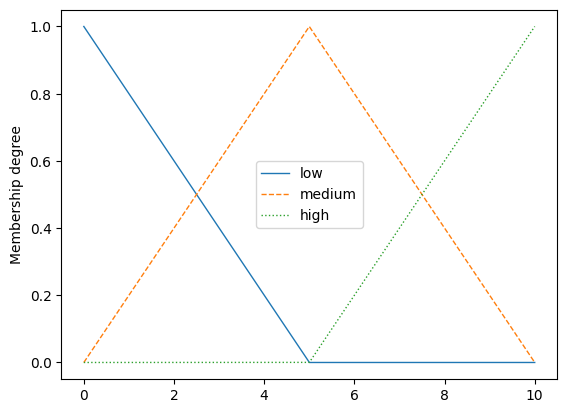

In [ ]:
# Triangle
Tri_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="low")
Tri_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="medium")
Tri_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="high")
sf.LinguisticVariable([Tri_1, Tri_2, Tri_3], universe_of_discourse=[0, 10]).plot()

## Trapezoid

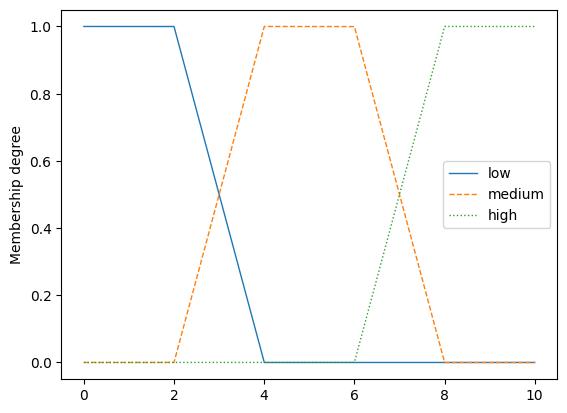

In [ ]:
# Trapezoid
Tra_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=2, d=4), term="low")
Tra_2 = FuzzySet(function=Trapezoidal_MF(a=2, b=4, c=6, d=8), term="medium")
Tra_3 = FuzzySet(function=Trapezoidal_MF(a=6, b=8, c=10, d=10), term="high")
sf.LinguisticVariable([Tra_1, Tra_2, Tra_3], universe_of_discourse=[0, 10]).plot()

## Gaussian

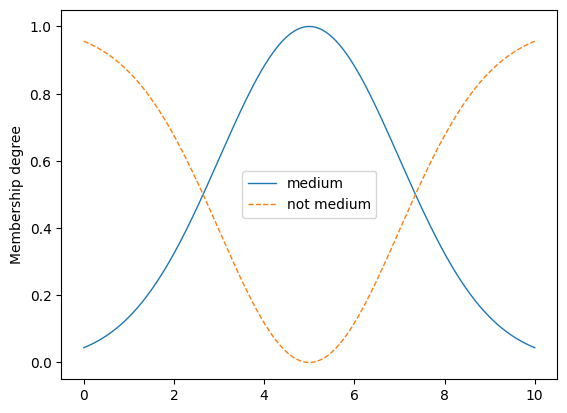

In [ ]:
# Gaussian
G_1 = FuzzySet(function=Gaussian_MF(mu=5, sigma=2), term="medium")
G_2 = FuzzySet(function=InvGaussian_MF(mu=5, sigma=2), term="not medium")
sf.LinguisticVariable([G_1, G_2], universe_of_discourse=[0, 10]).plot()

## Double Gaussian

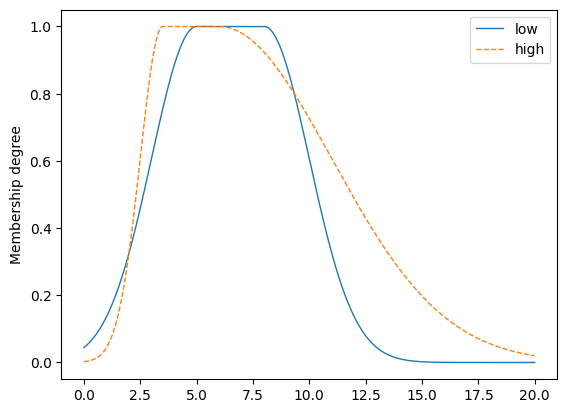

In [ ]:
# Double Gaussian
DG_1 = FuzzySet(function=DoubleGaussian_MF(mu1=5, sigma1=2, mu2=8, sigma2=2), term="low")
DG_2 = FuzzySet(function=DoubleGaussian_MF(mu1=3.5, sigma1=1, mu2=6, sigma2=5), term="high")
sf.LinguisticVariable([DG_1, DG_2], universe_of_discourse=[0, 20]).plot()

## Sigmoid

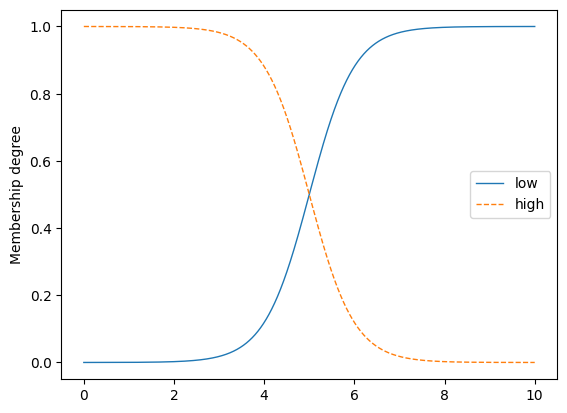

In [ ]:
# Sigmoid
Sigmoid_MF
S_1 = FuzzySet(function=Sigmoid_MF(c=5, a=2), term="low")
S_2 = FuzzySet(function=InvSigmoid_MF(c=5, a=2), term="high")
sf.LinguisticVariable([S_1, S_2], universe_of_discourse=[0, 10]).plot()

## Funkcja

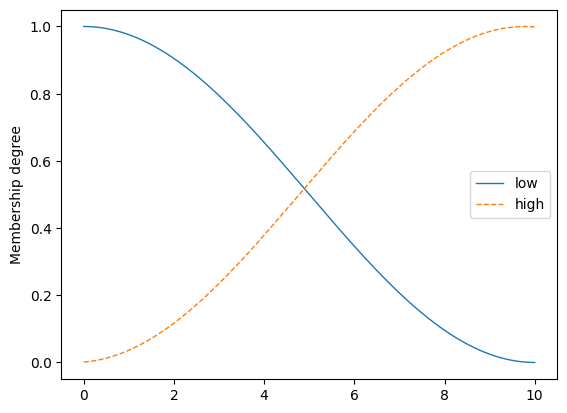

In [ ]:
# Function-based fuzzy set
import numpy as np
def fun1(x):
    return 0.5*np.cos(0.314*x)+0.5
def fun2(x):
    return 0.5*np.sin(0.314*x-1.5)+0.5

F_1 = FuzzySet(function=fun1, term="low")
F_2 = FuzzySet(function=fun2, term="high")
sf.LinguisticVariable([F_1, F_2], universe_of_discourse=[0, 10]).plot()

## Singletons

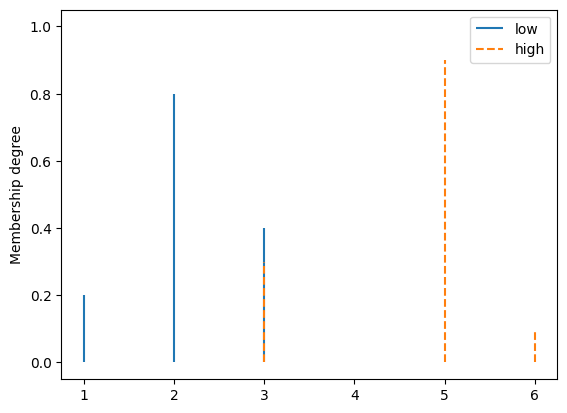

In [ ]:
# Singletons set
Ss_1 = SingletonsSet(pairs=[[1.0, 0.2], [2.0, 0.8], [3.0, 0.4]], term="low")
Ss_2 = SingletonsSet(pairs=[[3.0, 0.3], [5.0, 0.9], [6.0, 0.1]], term="high")
sf.LinguisticVariable([Ss_1, Ss_2], universe_of_discourse=[0, 10]).plot()